In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline  

import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import scipy.stats as stats
import math 

In [33]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [34]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [35]:
#convert column name ['date'] from object to datetime 
df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x=='?' else x)

#Convert sqft_basement to a number
df['sqft_basement'] = df['sqft_basement'].astype(float)

#might be cool to create a function that takes any column date and converts it 

df['date'] = pd.to_datetime(df['date'])

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [54]:
#replacing all ? with 0's - major assumption that requires data enrichment to correct
#

df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x==
                                             '?' else x)

df['sqft_basement'] = df['sqft_basement'].astype(float)

df['sqft_basement'].describe()

count    20568.000000
mean       274.475301
std        414.237778
min          0.000000
25%          0.000000
50%          0.000000
75%        530.000000
max       1990.000000
Name: sqft_basement, dtype: float64

In [37]:
# Identify null values 

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [39]:
#Repeat the same process for view which indicates how many times a house has been viewed

#We replaced all views with a median value, its safe to assume houses on the market in these areas are quite popular and viewed 
median = df['view'].median()
df['view'] = df['view'].fillna(value=median)#Waterfront 0 = No waterfront, 1=Waterfront 

#Making all nulls 0 indicating no waterfront 

df['waterfront'].isna().sum()

df['waterfront'] = df['waterfront'].fillna(0)


df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

In [40]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [43]:
#dropped all duplicates for id 
#inplace = True changes the dataframe permanently

df.drop_duplicates(subset=['id'], inplace=True)

In [46]:
#drop id column
df.drop(['id'], axis=1, inplace=True)

In [47]:
df.shape

(21420, 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0F3B29C50>,
      dtype=object)

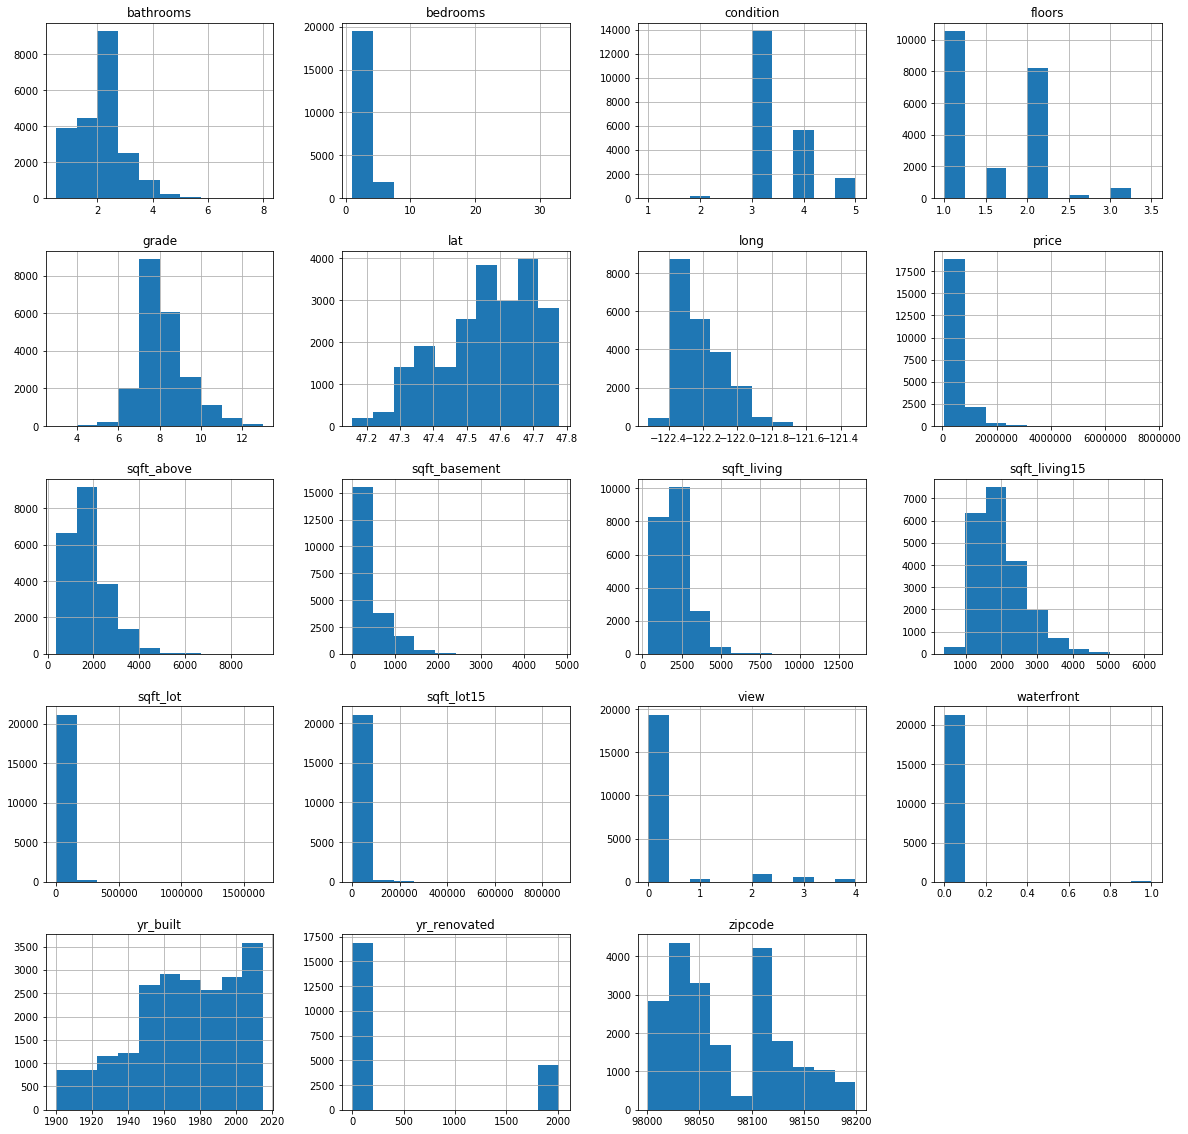

In [48]:
df.hist(figsize=(20,20))

In [49]:
#sqft_living 

indexNames = df[df['sqft_living'] >= 5000 ].index
df.drop(indexNames , inplace=True)

# sqft_above 

indexNames = df[df['sqft_above'] >= 4500 ].index
df.drop(indexNames , inplace=True)

#sqft_basement 

indexNames = df[df['sqft_basement'] >= 2000 ].index
df.drop(indexNames , inplace=True)

# dropping sqft_lot outliers

indexNames = df[df['sqft_lot'] >= 100000 ].index
df.drop(indexNames , inplace=True)

# dropping sqft_living15 outliers

indexNames = df[df['sqft_living15'] >= 4500 ].index
df.drop(indexNames , inplace=True)

# dropping sqft_lot15 outliers

indexNames = df[df['sqft_lot15'] >= 100000 ].index
df.drop(indexNames , inplace=True)


# dropping grade outliers
indexNames = df[df['grade'] == 3 ].index
df.drop(indexNames , inplace=True)

indexNames = df[df['grade'] == 13 ].index
df.drop(indexNames , inplace=True)

# dropping bedroom outliers over 8 rooms
indexNames = df[df['bedrooms'] >= 8 ].index
df.drop(indexNames , inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0F4101710>,
      dtype=object)

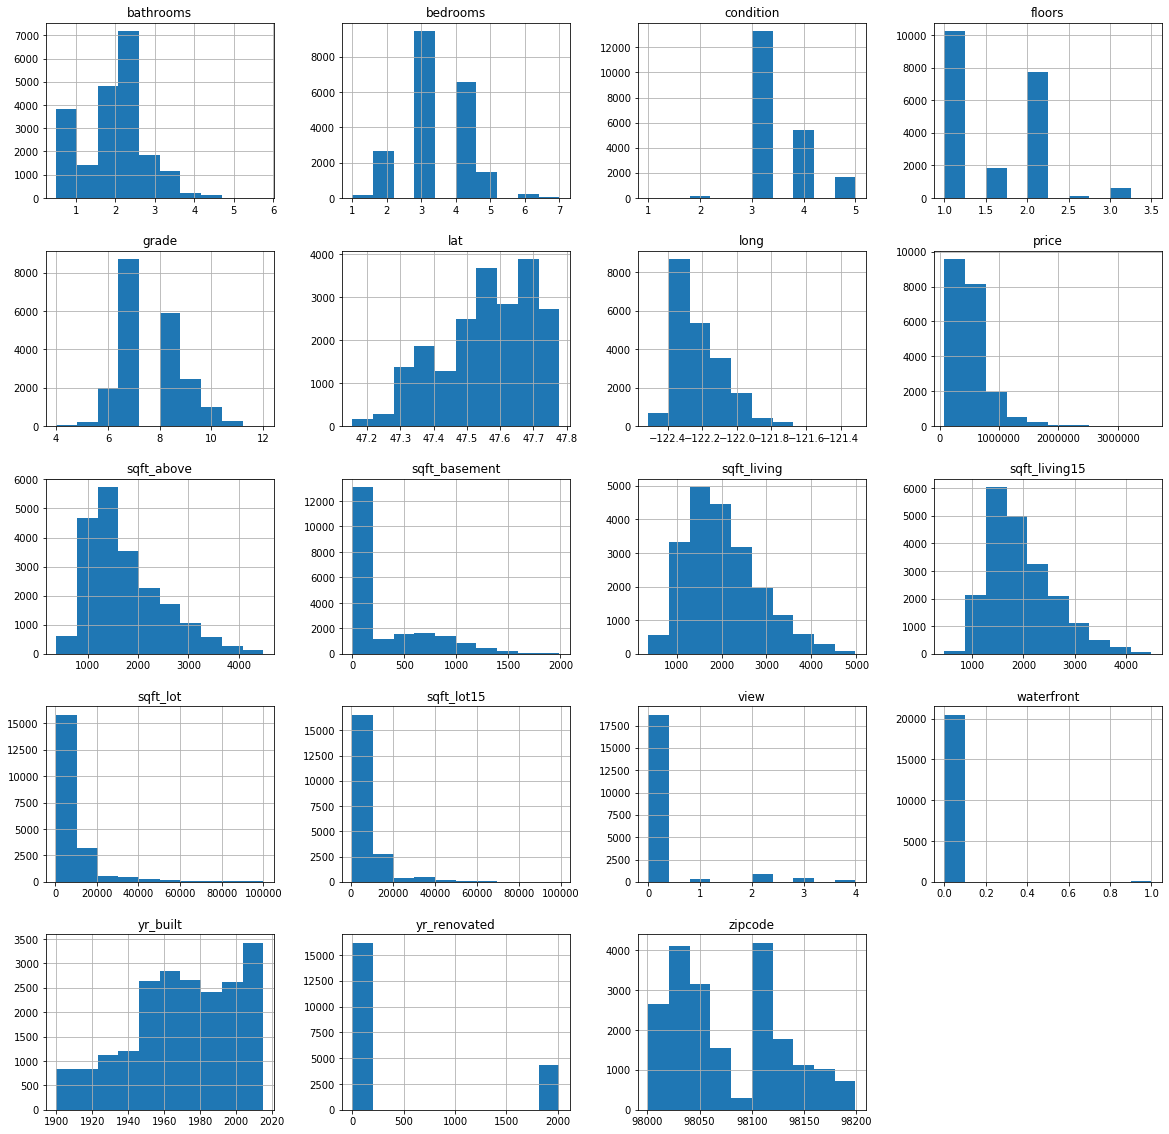

In [50]:
df.hist(figsize=(20,20))

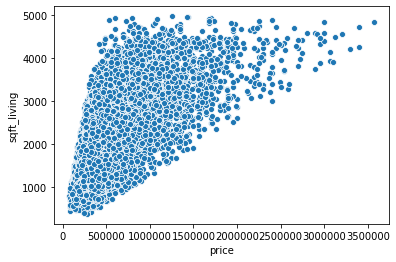

In [55]:
sns.scatterplot(x='price', y='sqft_living', data=df)

(array([ 576., 3342., 4967., 4445., 3178., 1956., 1163.,  579.,  291.,
          71.]),
 array([ 370.,  831., 1292., 1753., 2214., 2675., 3136., 3597., 4058.,
        4519., 4980.]),
 <a list of 10 Patch objects>)

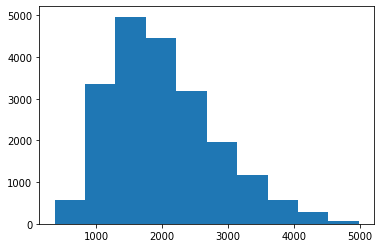

In [56]:
# Histogram of variable 

plt.hist(df['sqft_living'])

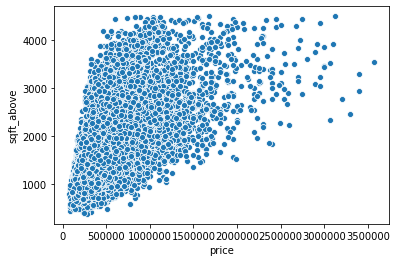

In [57]:
sns.scatterplot(x='price', y='sqft_above', data=df)

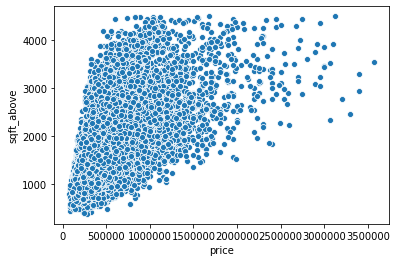

In [58]:
sns.scatterplot(x='price', y='sqft_above', data=df)

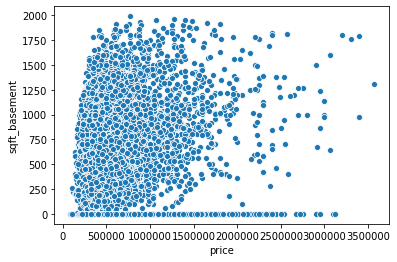

In [59]:
sns.scatterplot(x='price', y='sqft_basement', data=df)

(array([13111.,  1164.,  1558.,  1602.,  1413.,   875.,   480.,   226.,
           93.,    46.]),
 array([   0.,  199.,  398.,  597.,  796.,  995., 1194., 1393., 1592.,
        1791., 1990.]),
 <a list of 10 Patch objects>)

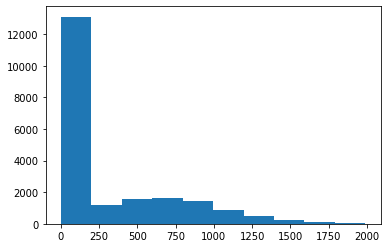

In [60]:
plt.hist(df['sqft_basement'])

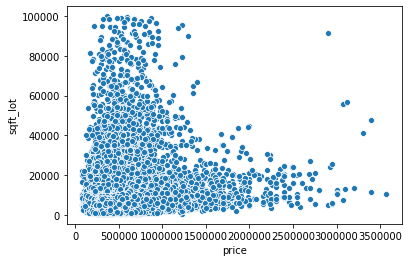

In [61]:
sns.scatterplot(x='price', y='sqft_lot', data=df)

(array([15796.,  3180.,   525.,   443.,   287.,   137.,    73.,    50.,
           39.,    38.]),
 array([  520. , 10459.6, 20399.2, 30338.8, 40278.4, 50218. , 60157.6,
        70097.2, 80036.8, 89976.4, 99916. ]),
 <a list of 10 Patch objects>)

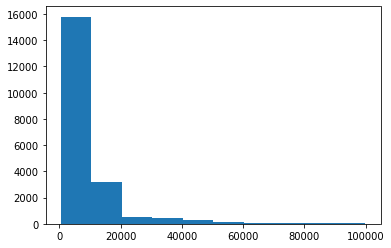

In [62]:
plt.hist(df['sqft_lot'])

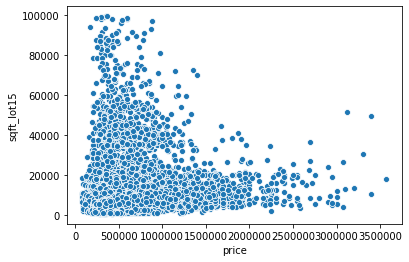

In [63]:
sns.scatterplot(x='price', y='sqft_lot15', data=df)

(array([16528.,  2767.,   383.,   437.,   222.,   109.,    45.,    29.,
           26.,    22.]),
 array([  651. , 10517.5, 20384. , 30250.5, 40117. , 49983.5, 59850. ,
        69716.5, 79583. , 89449.5, 99316. ]),
 <a list of 10 Patch objects>)

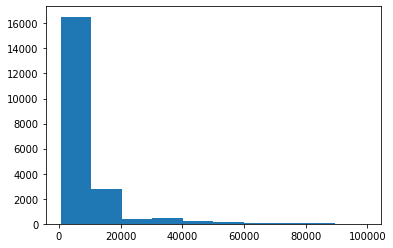

In [64]:
plt.hist(df['sqft_lot15'])

In [ ]:
# Encode Categorical Variables 

In [65]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [66]:
 df[['view', 'condition', 'waterfront','grade', 'yr_built', 'yr_renovated']]

,view,condition,waterfront,grade,yr_built,yr_renovated
0,0.0,3,0.0,7,1955,0.0
1,0.0,3,0.0,7,1951,1991.0
2,0.0,3,0.0,6,1933,1933.0
3,0.0,5,0.0,7,1965,0.0
4,0.0,3,0.0,8,1987,0.0
...,...,...,...,...,...,...
21592,0.0,3,0.0,8,2009,0.0
21593,0.0,3,0.0,8,2014,0.0
21594,0.0,3,0.0,7,2009,0.0
21595,0.0,3,0.0,8,2004,0.0


In [67]:
 df[['view', 'condition', 'waterfront','grade', 'yr_built', 'yr_renovated']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20568 entries, 0 to 21596
Data columns (total 6 columns):
view            20568 non-null float64
condition       20568 non-null int64
waterfront      20568 non-null float64
grade           20568 non-null int64
yr_built        20568 non-null int64
yr_renovated    20568 non-null float64
dtypes: float64(3), int64(3)
memory usage: 1.1 MB


In [169]:
#One hot encoded variables

pd.get_dummies(df, columns=['view', 'condition', 'waterfront','grade', 'yr_built', 'yr_renovated'], drop_first=True)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,-0.399924,-1.492128,-1.044272,-0.905984,-0.076283,-0.292136,-0.636484,-0.550966,-0.749355,-0.530155,-0.520003,-0.954664,-0.399311,221900.0
1,-0.399924,0.229616,0.691343,0.944490,-0.076283,-0.292136,-0.636484,-0.550966,0.584910,-0.665889,1.943098,-0.408446,-0.184876,538000.0
2,-1.543007,-1.492128,-1.556217,-0.905984,-0.076283,-0.292136,-0.636484,-1.462066,-1.301929,-1.276692,1.871345,1.198997,-0.139272,180000.0
3,0.743160,1.262663,-0.070330,-0.905984,-0.076283,-0.292136,2.434405,-0.550966,-0.924561,-0.190820,-0.520003,-0.923452,-0.469388,604000.0
4,-0.399924,-0.114733,-0.419950,-0.905984,-0.076283,-0.292136,-0.636484,0.360134,-0.075484,0.555717,-0.520003,-0.236777,-0.199538,510000.0


In [167]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [76]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.295895,0.475130,0.649537,0.114020,0.257006,0.226684,0.380726,0.055636,0.649740,0.544432,0.275985,0.024697,0.056880,-0.027728,0.356335,0.002073,0.571458,0.103520
bedrooms,0.295895,1.000000,0.512304,0.606873,0.111522,0.171689,-0.014387,0.059583,0.027057,0.351242,0.493440,0.280146,0.164362,-0.003050,-0.161359,-0.024106,0.146905,0.401512,0.101199
bathrooms,0.475130,0.512304,1.000000,0.730572,0.073022,0.508116,0.038929,0.148080,-0.127606,0.635341,0.653066,0.236231,0.518330,0.012450,-0.199615,0.016477,0.222226,0.545502,0.073055
sqft_living,0.649537,0.606873,0.730572,1.000000,0.242852,0.354000,0.066317,0.237980,-0.054799,0.735555,0.856707,0.389845,0.322234,0.018127,-0.193276,0.051570,0.237494,0.752808,0.227849
sqft_lot,0.114020,0.111522,0.073022,0.242852,1.000000,-0.103079,0.081951,0.072071,0.036217,0.158166,0.232490,0.053026,0.035225,0.011308,-0.194081,-0.063615,0.282134,0.286167,0.834525
floors,0.257006,0.171689,0.508116,0.354000,-0.103079,1.000000,0.012738,0.013981,-0.270190,0.458967,0.537410,-0.272945,0.493906,0.000194,-0.057480,0.044819,0.124918,0.271116,-0.097701
waterfront,0.226684,-0.014387,0.038929,0.066317,0.081951,0.012738,1.000000,0.377285,0.020347,0.058429,0.040582,0.054896,-0.030546,0.035433,0.032003,-0.015500,-0.037125,0.068237,0.095022
view,0.380726,0.059583,0.148080,0.237980,0.072071,0.013981,0.377285,1.000000,0.048459,0.214074,0.116553,0.245902,-0.074200,0.046545,0.106773,0.017217,-0.104322,0.252549,0.063101
condition,0.055636,0.027057,-0.127606,-0.054799,0.036217,-0.270190,0.020347,0.048459,1.000000,-0.149906,-0.165610,0.184498,-0.364399,-0.028809,-0.002223,-0.011179,-0.100217,-0.090942,0.047479
grade,0.649740,0.351242,0.635341,0.735555,0.158166,0.458967,0.058429,0.214074,-0.149906,1.000000,0.727332,0.116053,0.448314,0.005845,-0.175317,0.117055,0.189606,0.693347,0.161903


In [78]:
# OLS Regression

#It didnt seem to work!

import statsmodels.api as sm
import statsmodels.formula.api as smf

col_names = df.describe().columns #What does this?

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value ']] #creating an array of results we care about

for idx, val in enumerate(col_names):
    print('price~' + val)
    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append({val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]})

    print(results[idx+1])
    print(model.summary())

price~price
{4.0381564758718014e-10, 0.9999999999999997, 1.0, 0.0, 'price'}
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.392e+34
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:43:47   Log-Likelihood:             4.2649e+05
No. Observations:               20568   AIC:                        -8.530e+05
Df Residuals:                   20566   BIC:                        -8.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [79]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.295895,0.475130,0.649537,0.114020,0.257006,0.226684,0.380726,0.055636,0.649740,0.544432,0.275985,0.024697,0.056880,-0.027728,0.356335,0.002073,0.571458,0.103520
bedrooms,0.295895,1.000000,0.512304,0.606873,0.111522,0.171689,-0.014387,0.059583,0.027057,0.351242,0.493440,0.280146,0.164362,-0.003050,-0.161359,-0.024106,0.146905,0.401512,0.101199
bathrooms,0.475130,0.512304,1.000000,0.730572,0.073022,0.508116,0.038929,0.148080,-0.127606,0.635341,0.653066,0.236231,0.518330,0.012450,-0.199615,0.016477,0.222226,0.545502,0.073055
sqft_living,0.649537,0.606873,0.730572,1.000000,0.242852,0.354000,0.066317,0.237980,-0.054799,0.735555,0.856707,0.389845,0.322234,0.018127,-0.193276,0.051570,0.237494,0.752808,0.227849
sqft_lot,0.114020,0.111522,0.073022,0.242852,1.000000,-0.103079,0.081951,0.072071,0.036217,0.158166,0.232490,0.053026,0.035225,0.011308,-0.194081,-0.063615,0.282134,0.286167,0.834525
floors,0.257006,0.171689,0.508116,0.354000,-0.103079,1.000000,0.012738,0.013981,-0.270190,0.458967,0.537410,-0.272945,0.493906,0.000194,-0.057480,0.044819,0.124918,0.271116,-0.097701
waterfront,0.226684,-0.014387,0.038929,0.066317,0.081951,0.012738,1.000000,0.377285,0.020347,0.058429,0.040582,0.054896,-0.030546,0.035433,0.032003,-0.015500,-0.037125,0.068237,0.095022
view,0.380726,0.059583,0.148080,0.237980,0.072071,0.013981,0.377285,1.000000,0.048459,0.214074,0.116553,0.245902,-0.074200,0.046545,0.106773,0.017217,-0.104322,0.252549,0.063101
condition,0.055636,0.027057,-0.127606,-0.054799,0.036217,-0.270190,0.020347,0.048459,1.000000,-0.149906,-0.165610,0.184498,-0.364399,-0.028809,-0.002223,-0.011179,-0.100217,-0.090942,0.047479
grade,0.649740,0.351242,0.635341,0.735555,0.158166,0.458967,0.058429,0.214074,-0.149906,1.000000,0.727332,0.116053,0.448314,0.005845,-0.175317,0.117055,0.189606,0.693347,0.161903


In [ ]:
# Experiment 1 - All features, one hot encoded variables, includes lat&long

In [81]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [87]:
#Dropped sqft_lot due to mc

outcome = 'price'

x_cols = [ 'bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

In [88]:
# Some brief preprocessing
df.columns = [col.replace(' ', '_') for col in df.columns]
for col in x_cols:
    df[col] = (df[col] - df[col].mean())/df[col].std()  
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,-0.399924,-1.492128,-1.044272,-0.405855,-0.905984,-0.076283,-0.292136,-0.636484,-0.550966,-0.749355,-0.662603,-0.530155,-0.520003,1.841346,-0.365633,-0.277312,-0.954664,-0.399311
1,2014-12-09,538000.0,-0.399924,0.229616,0.691343,-0.256570,0.944490,-0.076283,-0.292136,-0.636484,-0.550966,0.584910,0.303026,-0.665889,1.943098,0.854606,1.154858,-0.728517,-0.408446,-0.184876
2,2015-02-25,180000.0,-1.543007,-1.492128,-1.556217,0.002051,-0.905984,-0.076283,-0.292136,-0.636484,-1.462066,-1.301929,-0.662603,-1.276692,1.871345,-0.951315,1.277338,-0.102651,1.198997,-0.139272
3,2014-12-09,604000.0,0.743160,1.262663,-0.070330,-0.466806,-0.905984,-0.076283,-0.292136,2.434405,-0.550966,-0.924561,1.534203,-0.190820,-0.520003,1.059401,-0.296059,-1.267053,-0.923452,-0.469388
4,2015-02-18,510000.0,-0.399924,-0.114733,-0.419950,-0.177990,-0.905984,-0.076283,-0.292136,-0.636484,0.360134,-0.075484,-0.662603,0.555717,-0.520003,-0.094899,0.399686,1.265521,-0.236777,-0.199538


In [89]:
from statsmodels.formula.api import ols

In [90]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2709.
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:47:49   Log-Likelihood:            -2.7696e+05
No. Observations:               20568   AIC:                         5.540e+05
Df Residuals:                   20550   BIC:                         5.541e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.186e+05   1189.413    435.984      0.000    5.16e+05    5.21e+05
bedrooms      -2.287e+04   1566.076    -14.601      0.000   -2.59e+04   -1.98e+04
bathrooms      2.764e+04   2093.828     13.199      0.000    2.35e+04    3.17e+04
sqft_living    6.205e+04   1.33e+04      4.682      0.000    3.61e+04     8.8e+04
floors         1.095e+04   1730.811      6.325      0.000    7555.445    1.43e+04
waterfront     3.798e+04   1292.756     29.379      0.000    3.54e+04    4.05e+04
view            3.99e+04   1397.877     28.542      0.000    3.72e+04    4.26e+04
condition      1.891e+04   1318.127     14.348      0.000    1.63e+04    2.15e+04
grade           1.09e+05   2091.988     52.092      0.000    1.05e+05    1.13e+05
sqft_above     3.804e+04   1.22e+04      3.108      0.002     1.4e+04     6.2e+04
sqft_basement  1.463e+04   6772.751      2.160      0.031    1351.765    2.79e+04
yr_built      -7.679e+04   1779.531    -43.153      0.000   -8.03e+04   -7.33e+04
yr_renovated   3998.3863   1202.436      3.325      0.001    1641.517    6355.256
zipcode       -2.634e+04   1534.019    -17.169      0.000   -2.93e+04   -2.33e+04
lat            8.112e+04   1289.918     62.888      0.000    7.86e+04    8.36e+04
long          -1.999e+04   1610.834    -12.407      0.000   -2.31e+04   -1.68e+04
sqft_living15  2.763e+04   2054.533     13.449      0.000    2.36e+04    3.17e+04
sqft_lot15    -1.282e+04   1325.397     -9.670      0.000   -1.54e+04   -1.02e+04
==============================================================================
Omnibus:                    10871.093   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           176446.285
Skew:                           2.171   Prob(JB):                         0.00
Kurtosis:                      16.676   Cond. No.                         36.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
df.shape

(20568, 20)

# Regression Model Validation

In [112]:
y = df['price']

X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
    'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']]

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [115]:
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15426 5142 15426 5142


In [ ]:
# Apply Model to train set 

In [116]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [117]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# Calculate predictions on training and test sets

In [119]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
# Calculate training and test residuals 

In [120]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [121]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
# Calculate Mean Squared Error (MSE)
# A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.



In [122]:
from sklearn.metrics import mean_squared_error

In [123]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 34365110675.28509
Test Mean Squarred Error: 36056051973.34116


In [165]:
import math

math.sqrt(test_mse)

185321.27974401697

In [ ]:
# Evaluate effect of train test split size

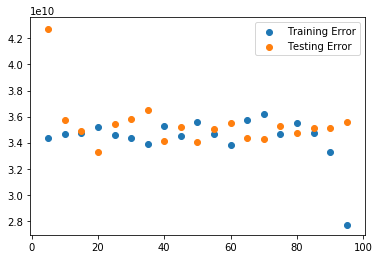

In [126]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [ ]:
# Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data.



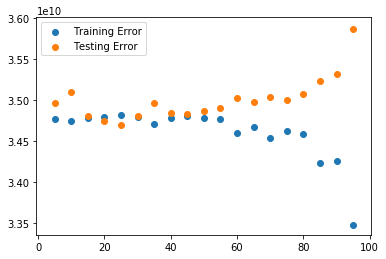

In [166]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [138]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [139]:
#Cross-Validation

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [141]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16454 4114 16454 4114


In [142]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
# Residuals and MSE 

In [143]:
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

34343976725.960197

In [155]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')

In [156]:
cv_5_results

array([-3.30920080e+10, -3.32333025e+10, -3.30789261e+10, -3.59514411e+10,
       -4.11936211e+10])